### Basic Introduction

- Random forest algorithm one of the __populer algorithm__ in Machine Learning.
- Random forest algorithm belongs to __supervised learning techniques__.
- Random forest alogrithm can be used in __regression and classification__ problems.
- Random forest algorithm based on __ensemble learning__ .
- As name suggested that __Random forest clssifier that contains number of decision trees on various subset dataset and takes the predictive accuracy of dataset__ .
- Greater the numbers of tree in the forest leads to high accuracy and prevents the problem of  __*overfitting*__ .

_ _ _ _

##### Q.1. Explain overfitting and underfitting.
Ans. : 
       
       Overfitting : Good performance on training data and poor performance on general data.

       Underfitting : Poor performance on training data and porr performance on general data.
 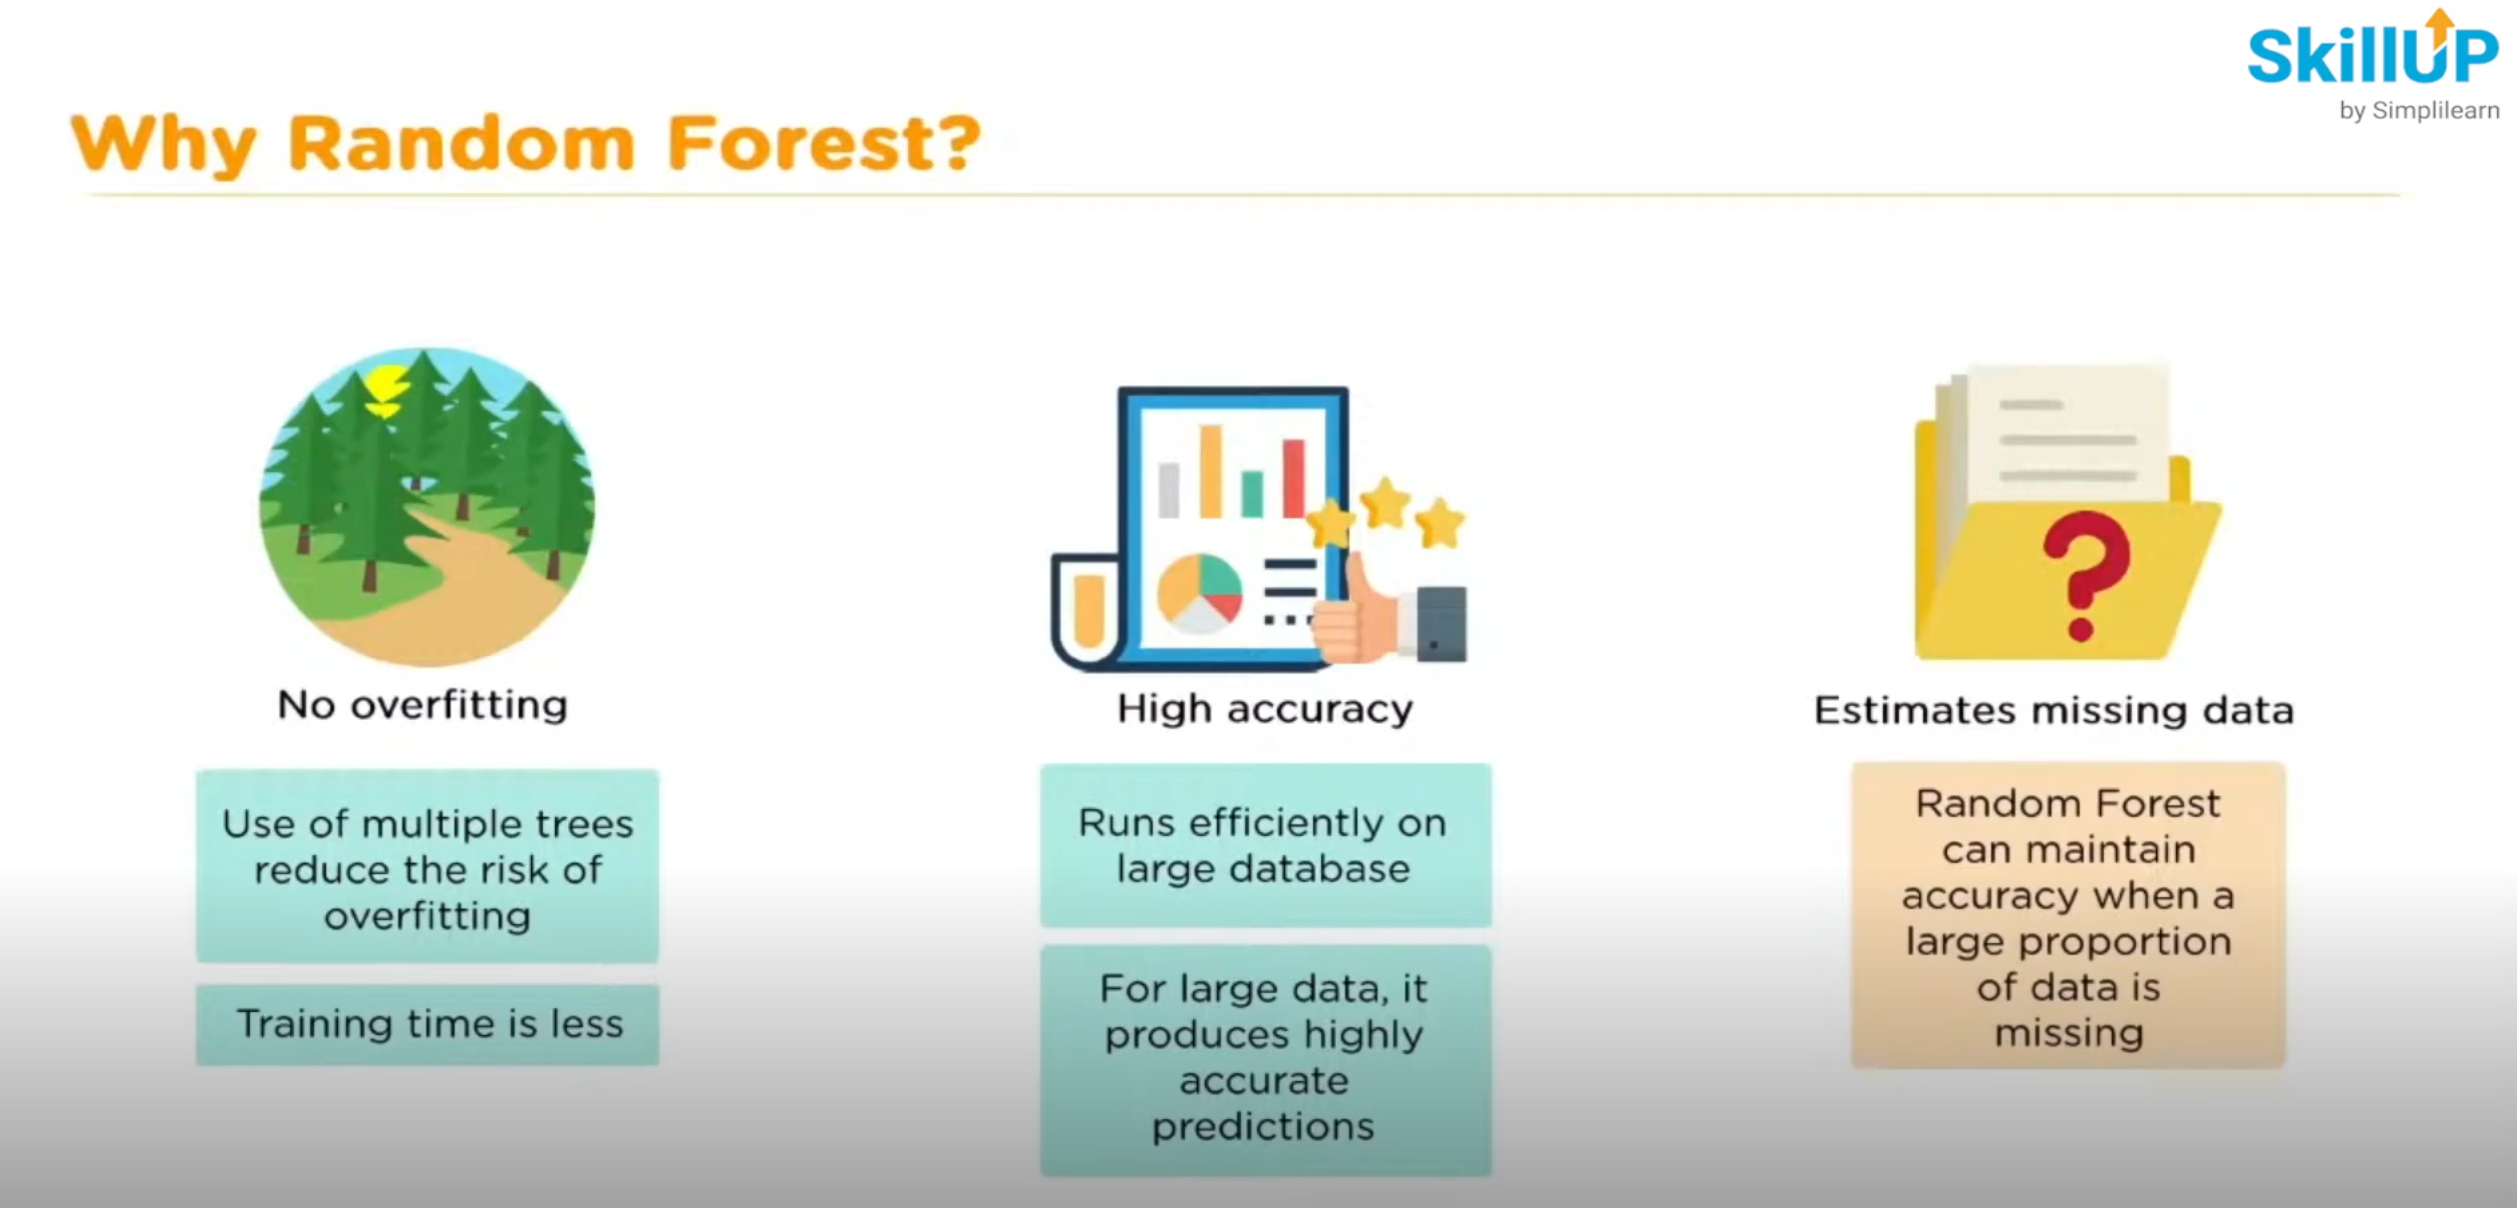

In [1]:
# lets begin with loading iris dataset
# best part is, dataset already available with sklearn package.

from sklearn.datasets import load_iris

In [2]:
# as we know we are working on random forest , lets load
from sklearn.ensemble import RandomForestClassifier


In [9]:
# lets import important library
import pandas as pd
import numpy as np

In [10]:
# setting random seed
np.random.seed(0)

In [11]:
# creating an object called iris with iris data
iris = load_iris()

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# creating a datafram with the four features variable.
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [15]:
# viewisng the top 5 rows 
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [18]:
# adding a new column for the species name.
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)

In [19]:
df['species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [20]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [22]:
# creating test and train data
df['is_train']= np.random.uniform(0,1,len(df)) <=.75

In [23]:
# viewing the the top 5 rows
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  is_train  
0  setosa      True  
1  setosa      True  
2  setosa      True  
3  setosa      True  
4  setosa      True

In [24]:
# creatig dataframes wtin test and training rows
train,test =df[df['is_train']==True],df[df['is_train']==False]

In [26]:
# show the training data and testing data
print(' Training data:',len(train))
print(' Testing  data:',len(test))

 Training data: 118
 Testing  data: 32


In [29]:
# create a list of the features columns name
features =df.columns [:4]
# view features
features


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [30]:
# converting each species name into digits
y=pd.factorize(train['species'])[0]
# viewing target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [32]:
# creating random forest classifier
clf= RandomForestClassifier(n_jobs=2,random_state=0)

In [34]:
# Training the classifier.
clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [35]:
#Applying the trained classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [36]:
# viewing the predicted probabilities of the first 10 obs.
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [37]:
# mapping name for the plants for each predicted plant class
preds=iris.target_names[clf.predict(test[features])]

In [38]:
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [39]:
# viewing the ACTUAL species for the first five observaitons.
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [40]:
# creating confusion matrix
pd.crosstab(test['species'],preds,rownames=['Actual Species'],colnames=['Predicted Species'])

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 13           0          0
versicolor              0           5          2
virginica               0           0         12

In [43]:
# from above confusion matrix..
accurate_result_(total)= 13+5+12 = 30
Inaccurate_result_(total)= 02

SyntaxError: can't assign to function call (<ipython-input-43-82d9eebc5a38>, line 2)

In [50]:
accuracy= ((30/32)*100)
print('Model accuracy :',accuracy)

Model accuracy : 93.75


In [52]:
preds=iris.target_names[clf.predict([[5.0,3.6,1.4,2.0]])]

In [53]:
preds

array(['setosa'], dtype='<U10')